In [4]:
# Import the required library. Only numpy financial is required
import numpy_financial as npf
from home_loan import savings
import pandas as pd
import numpy as np
import requests


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2022-07-28 18:53:19.424 WARNING streamlit.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2022-07-28 18:53:19.652 
  command:

    streamlit run c:\Users\samro\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [5]:
# You want to pay no more than a fixed amount. How much can you borrow?
# Enter the Known variables of the loan (Interest rate, length of loan, amount borrowed)

int_rate = .0619       # interest rate; enter 5% as .05

years = 30            # years of the loan. 

pmts_year = 12       # number of payments each year.

monthly_pmt = 2141    # the amount of your free cashflow

In [6]:
# Calculate the maximum amount to borrow given a specific payment 
loan_amount = npf.pv(int_rate/pmts_year, years*pmts_year, monthly_pmt * -1)
print("With a payment of ${0:,.2f}, you can borrow ${1:,.2f}.".format(monthly_pmt, loan_amount))

With a payment of $2,141.00, you can borrow $349,939.40.


In [7]:
# Loan summary assuming all payments made on time at the agreed upon # amount
total_pmts = monthly_pmt * years * pmts_year
total_int = total_pmts - loan_amount
print("Assuming all payments are made on time, at the agreed upon amount.")
print("------------------------------------------------------------------")
print("Total principal paid: ${:,.2f}.".format(loan_amount))
print("Total interest paid:  ${:,.2f}.".format(total_int))
print("Total payments made:  ${:,.2f}.".format(total_pmts))

Assuming all payments are made on time, at the agreed upon amount.
------------------------------------------------------------------
Total principal paid: $349,939.40.
Total interest paid:  $420,820.60.
Total payments made:  $770,760.00.


In [9]:
api_key='8e935984687a40f79f1adf1d3ebfd548'
news_from_date = "2022-06-28"
url = "https://newsapi.org/v2/everything?q=melbourne-house-prices&from="+news_from_date+"&apiKey="+api_key
news = requests.get(url).json()

In [10]:
news

{'status': 'ok',
 'totalResults': 133,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,
   'title': 'U.S. firm to build $1.7 bln data centre, large-scale battery in Australia - Reuters.com',
   'description': 'Private-equity firm Quinbrook Infrastructure Partners said it has won approval to build a data centre worth A$2.5 billion ($1.7 billion) in Australia, that will eventually include one of the largest utility-scale batteries in the country.',
   'url': 'https://www.reuters.com/business/us-firm-build-17-bln-data-centre-large-scale-battery-australia-2022-07-08/',
   'urlToImage': 'https://www.reuters.com/pf/resources/images/reuters/reuters-default.png?d=101',
   'publishedAt': '2022-07-08T05:37:00Z',
   'content': 'MELBOURNE, July 8 (Reuters) - Private-equity firm Quinbrook Infrastructure Partners said it has won approval to build a data centre worth A$2.5 billion ($1.7 billion) in Australia, that will eventual… [+1956 chars]'},
  {'source': {'id': No

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pgeocode

In [1]:
def fetch_geo_data():
    housesold_df = pd.read_csv("../Code Blocks/Datasets/MELBOURNE_HOUSE_PRICES_SOLD.csv")
    nomi = pgeocode.Nominatim('au')
    housesold_df[['latitude', 'longitude']] = housesold_df.apply(lambda row: nomi.query_postal_code(row['Postcode'])[['latitude', 'longitude']], axis=1, result_type='expand')
    housesold_df = housesold_df.drop(columns= ['Unnamed: 0','Method','Date'])
    return housesold_df.to_csv()

SyntaxError: invalid syntax (<ipython-input-1-9e5a4c6d8e0a>, line 1)

In [16]:
fetch_geo_data()

,Suburb,Address,Rooms,Type,Price,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,latitude,longitude
0,Abbotsford,49 Lithgow St,3,h,1490000.0,Jellis,3067,Northern Metropolitan,4019,3.0,Yarra City Council,-37.8061,145.001500
1,Abbotsford,59A Turner St,3,h,1220000.0,Marshall,3067,Northern Metropolitan,4019,3.0,Yarra City Council,-37.8061,145.001500
2,Abbotsford,119B Yarra St,3,h,1420000.0,Nelson,3067,Northern Metropolitan,4019,3.0,Yarra City Council,-37.8061,145.001500
3,Aberfeldie,68 Vida St,3,h,1515000.0,Barry,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,-37.7498,144.898333
4,Airport West,92 Clydesdale Rd,2,h,670000.0,Nelson,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,-37.7238,144.877275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,Yallambie,8/6 Borlase St,3,t,655000.0,Buckingham,3085,Northern Metropolitan,1369,12.7,Banyule City Council,-37.7256,145.084567
30620,Preston,229 Murray Rd,3,h,808000.0,RW,3072,Northern Metropolitan,14577,8.4,Darebin City Council,-37.7241,145.015657
30621,Roxburgh Park,3 Carr Pl,3,h,566000.0,Raine,3064,Northern Metropolitan,5833,20.6,Hume City Council,-37.5476,144.937160
30622,Roxburgh Park,9 Parker Ct,3,h,500000.0,Raine,3064,Northern Metropolitan,5833,20.6,Hume City Council,-37.5476,144.937160


NameError: name 'st' is not defined

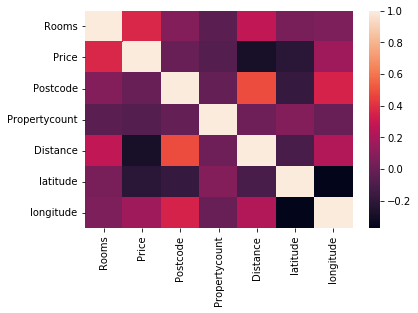

In [17]:
df = fetch_geo_data()
fig, ax = plt.subplots()
sns.heatmap(df.corr(), ax=ax)
st.write(fig)